In [1]:
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
from constants import graph_constants, SEED

In [2]:
G = nx.connected_caveman_graph(graph_constants['num_cliques'], graph_constants['clique_size'])
G = nx.to_directed(G)
np.random.seed(SEED)
for u,v,d in G.edges(data=True):
    d["weight"] = np.random.randint(1, 10)
    #d["weight"] = 0

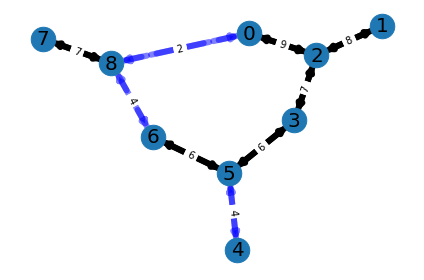

In [3]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=600)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
# save this graph as pickle object to work on it later

with open("graph.pkl", "wb") as f:
    pickle.dump(G, f)


In [5]:

with open("graph.pkl", "rb") as f:
    G = pickle.load(f)

nx.algorithms.shortest_path(G, 0, (len(G) - 1)//2, weight="weight")

[0, 8, 6, 5, 4]